In [6]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset0.csv')

In [7]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset['total_calls']=dataset['total_day_calls']+dataset['total_eve_calls']+dataset['total_night_calls']
dataset['total_minutes']=dataset['total_day_minutes']+dataset['total_eve_minutes']+dataset['total_night_minutes']
dataset['total_charges']=dataset['total_day_charge']+dataset['total_eve_charge']+dataset['total_night_charge']
dataset.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)
dataset['churn'] = dataset['churn'].replace({'no':0,'yes':1})
churn_column = dataset['churn']
dataset.drop('churn',axis=1,inplace=True)
dataset['churn'] = churn_column
###THIS SECTION IS DATASET SPECIFIC PROCESSING


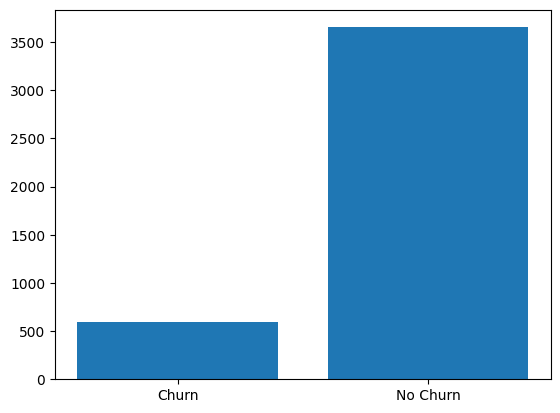

In [8]:
from pre_processor import PreProcessor


label_column = 'churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [9]:
binary_encode_columns=['state','area_code','international_plan','voice_mail_plan']
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']


In [10]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

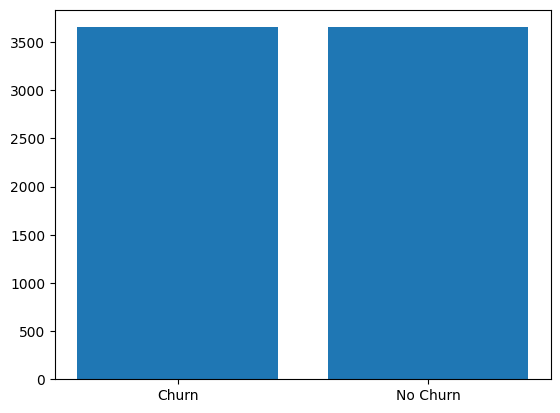

In [11]:
pre_processor.plot_imbalance()

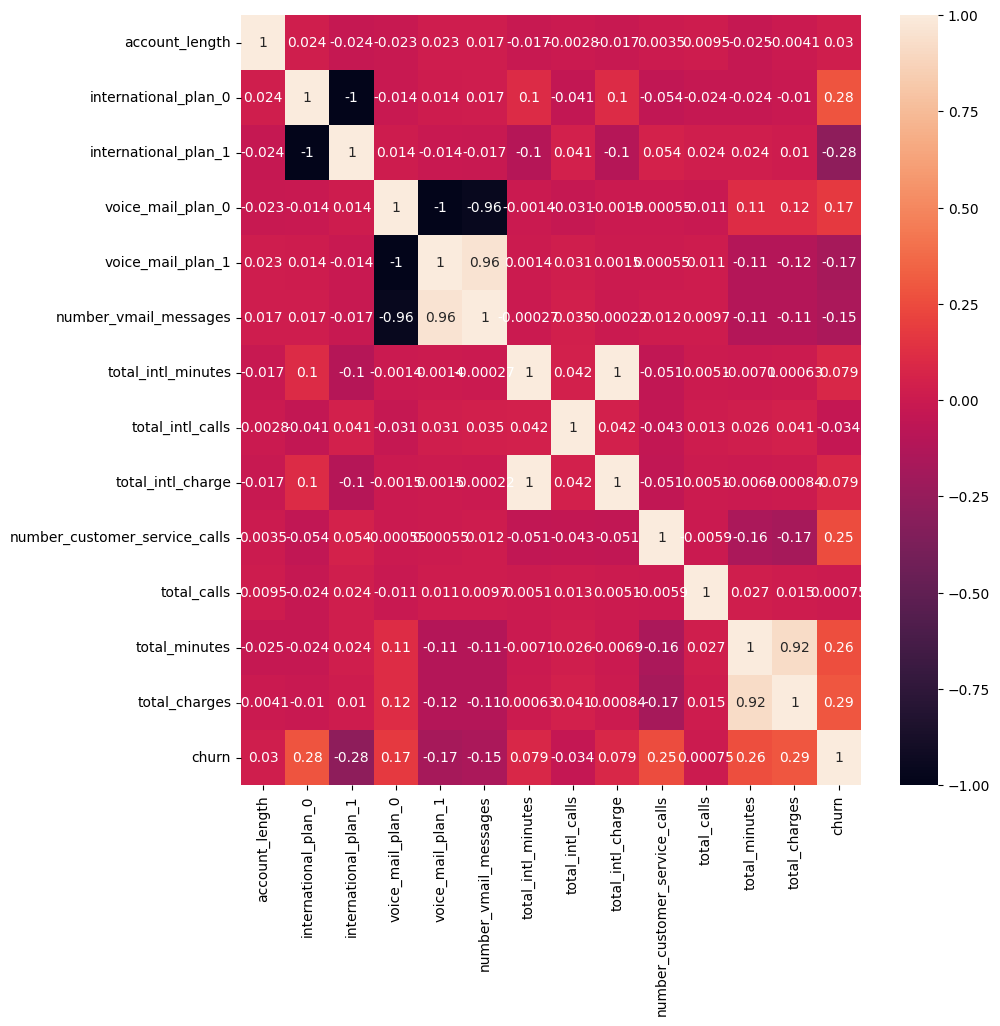

In [22]:
pre_processor.plot_correlation()

In [13]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.248424
number_customer_service_calls,0.162515
total_minutes,0.144484
international_plan_0,0.055319
total_intl_charge,0.054044
international_plan_1,0.051753
total_intl_calls,0.048864
total_intl_minutes,0.045574
total_calls,0.043515
account_length,0.041899


In [14]:
pre_processor.remove_features_by_importance(0.01)

In [15]:
pre_processor.split_features_labels()

In [16]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.280971
number_customer_service_calls,0.171579
total_minutes,0.135354
international_plan_1,0.056664
total_intl_minutes,0.056333
total_intl_calls,0.055069
international_plan_0,0.054176
total_intl_charge,0.049014
total_calls,0.045678
account_length,0.045437


In [17]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [18]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-10 22:15:40,751] A new study created in memory with name: no-name-2eaedc0c-147b-4c86-971e-50cd66306870
[I 2024-06-10 22:15:42,436] Trial 0 finished with value: 0.9614936955833929 and parameters: {'n_estimators': 84, 'max_depth': 16, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9614936955833929.
[I 2024-06-10 22:15:44,185] Trial 1 finished with value: 0.9272630863517584 and parameters: {'n_estimators': 97, 'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 18}. Best is trial 0 with value: 0.9614936955833929.
[I 2024-06-10 22:15:44,186] A new study created in memory with name: no-name-917ebf4c-e9cd-4c3a-98a0-aa918abebbfd
[I 2024-06-10 22:15:47,253] Trial 0 finished with value: 0.8603407666076848 and parameters: {'num_layers': 1, 'layer1_size': 61, 'layer2_size': 53, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.03096693315387922}. Best is trial 0 with value: 0.8603407666076848.
[I 2024-06-10 22:15:54,375] Trial 1 finished with 

In [19]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       703
         1.0       0.99      0.95      0.97       758

    accuracy                           0.97      1461
   macro avg       0.97      0.97      0.97      1461
weighted avg       0.97      0.97      0.97      1461

Neural Network
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       703
         1.0       0.95      0.93      0.94       758

    accuracy                           0.94      1461
   macro avg       0.94      0.94      0.94      1461
weighted avg       0.94      0.94      0.94      1461



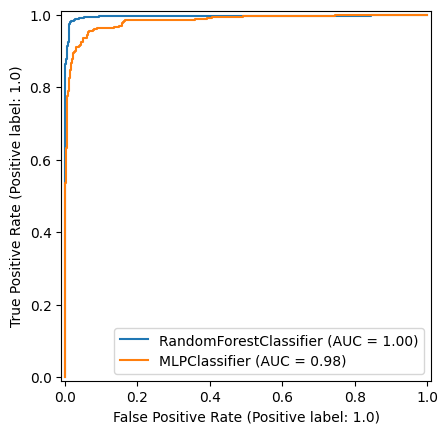

In [20]:
model_select.roc_curve()

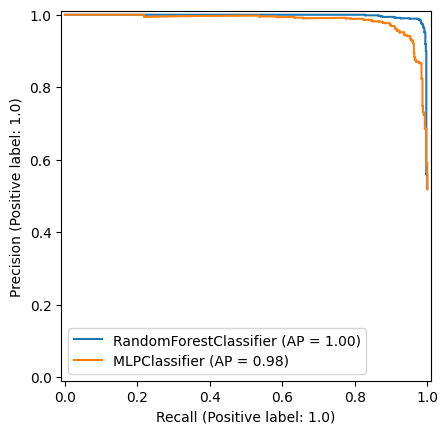

In [21]:
model_select.precision_recall_curve()